<a href="https://colab.research.google.com/github/srtaksande/MachineLearning/blob/main/Machine_Learning_Models_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/aug_train.csv", sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


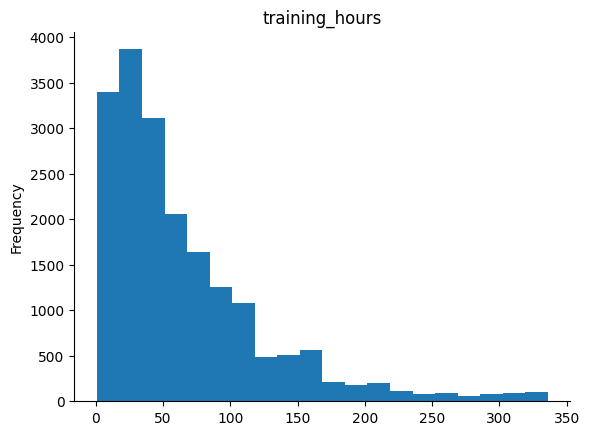

In [59]:
# @title training_hours

from matplotlib import pyplot as plt
df['training_hours'].plot(kind='hist', bins=20, title='training_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

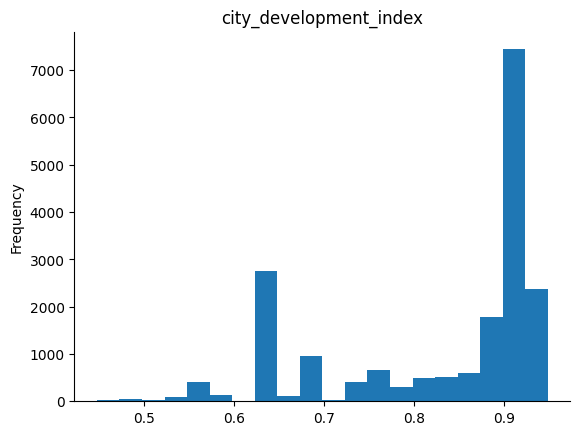

In [58]:
# @title city_development_index

from matplotlib import pyplot as plt
df['city_development_index'].plot(kind='hist', bins=20, title='city_development_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
df= df.drop(columns=['enrollee_id','city'])

In [42]:
column = (df.columns.values.tolist())
print(column)

['city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


In [43]:
df.isnull().sum()

,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938
company_type,6140
last_new_job,423


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


#Checking for wrong entries like symbols -,?,#,*,etc.

In [45]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

city_development_index : [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]
gender : ['Male' nan 'Female' 'Other']
relevent_experience : ['Has relevent experience' 'No relevent experience']
enrolled_university : ['no_enrollment' 'Full time course' nan 'Part time course']
education_level : ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline : ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience : ['>20' '15' '5' '<1' '11' '13'

In [46]:
df.isnull().sum()

,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938
company_type,6140
last_new_job,423


In [47]:
column = (df.columns.values.tolist())
print(column)

['city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


Importing Train and Test CSV files

In [49]:
df1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/aug_train.csv", sep=',')
df2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/aug_test.csv", sep=',')

In [50]:
column = (df1.columns.values.tolist())
print(column)

['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


In [51]:
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


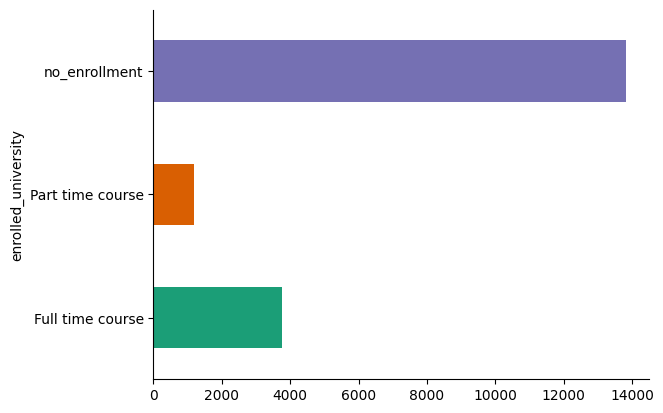

In [61]:
# @title enrolled_university

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('enrolled_university').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

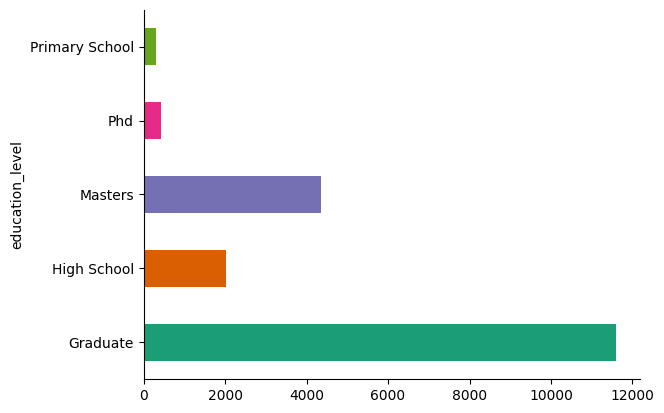

In [60]:
# @title education_level

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('education_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Removing colunms/ variables that are not necessary

In [52]:
train_data= df1.drop(columns=['enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','experience','target'])
test_data = df2.drop(columns=['enrollee_id','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type','last_new_job','experience'])



In [53]:
train_data.head()



,city_development_index,training_hours
0,0.920,36
1,0.776,47
2,0.624,83
3,0.789,52
4,0.767,8


In [54]:
test_data.head()

,city_development_index,training_hours
0,0.827,21
1,0.920,98
2,0.624,15
3,0.827,39
4,0.920,72


from matplotlib import pyplot as plt
_df_0['city_development_index'].plot(kind='hist', bins=20, title='city_development_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['training_hours'].plot(kind='hist', bins=20, title='training_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='city_development_index', y='training_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['city_development_index'].plot(kind='line', figsize=(8, 4), title='city_development_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['training_hours'].plot(kind='line', figsize=(8, 4), title='training_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['city_development_index'].plot(kind='hist', bins=20, title='city_development_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_3['city_development_index'].plot(kind='line', figsize=(8, 4), title='city_development_index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [55]:
# Shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (19158, 2)

Shape of testing data : (2129, 2)


Random Forest


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# view the top 3 rows of the dataset
print(train_data.head(3))
print(test_data.head(3))

# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['training_hours'],axis=1)
train_y = train_data['training_hours']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['training_hours'],axis=1)
test_y = test_data['training_hours']


model = RandomForestClassifier()

# fit the model with the training data
model.fit(train_x,train_y)

# number of trees used
print('\n\nNumber of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\n\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\n\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\n\nTarget on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\n\naccuracy_score on test dataset : ', accuracy_test)


   city_development_index  training_hours
0                   0.920              36
1                   0.776              47
2                   0.624              83
   city_development_index  training_hours
0                   0.827              21
1                   0.920              98
2                   0.624              15

Shape of training data : (19158, 2)

Shape of testing data : (2129, 2)


Number of Trees used :  100


Target on train data [28 89 28 ... 28 13 12]


accuracy_score on train dataset :  0.02750809061488673


Target on test data [ 9 28 28 ... 12 11 11]


accuracy_score on test dataset :  0.01456082667919211
